# HW3 Support Vector Machine and Decision Trees

# Due on 11/30 23:59 pm

## Vagner Machado - Fall 2020 - Data Analytics


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load from file
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

rate_marriage   age  yrs_married  children  religious  educ  had_affair  \
0            3.0  32.0          9.0       3.0        3.0  17.0           1   
1            3.0  27.0         13.0       3.0        1.0  14.0           1   
2            4.0  22.0          2.5       0.0        1.0  16.0           1   
3            4.0  37.0         16.5       4.0        3.0  16.0           1   
4            5.0  27.0          9.0       1.0        1.0  14.0           1   

   occ2  occ3  occ4  occ5  occ6  
0     1     0     0     0     0  
1     0     1     0     0     0  
2     0     1     0     0     0  
3     0     0     0     1     0  
4     0     1     0     0     0

In [3]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel with usual steps

In [4]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# I explore a few models based on the correlation extremes found in the data set
#print(df.corr())

# I chose to use intermediary C = 32 for the question 1 as a lower(2**-6) and higher(2**6) C value is explored ont question 2
c_val = 32

#Using two highest positive correlations as features - years_married and children
X = df[[ "yrs_married", "children"]]
Y = df["had_affair"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
model = svm.SVC(kernel='linear', C = c_val)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Accuracy score using the two highest positive correlations: \t\t", accuracy_score(Y_test,Y_pred))
print("Classification Table for two highest positive correlations:\n\n",classification_report(Y_test,Y_pred), "\n\n")

#Using two lowest correlations as features - rate_marriage and religious
X = df[[ "rate_marriage", "religious"]]
Y = df["had_affair"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
model = svm.SVC(kernel='linear', C = c_val)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Accuracy score using the two lowest negative correlations: \t\t", accuracy_score(Y_test,Y_pred))
print("Classification Table for two lowest negative correlations:\n\n",classification_report(Y_test,Y_pred), "\n\n")

#Using highest and lowest correlations as features - years_married and rate_marriage
X = df[[ "yrs_married", "rate_marriage"]]
Y = df["had_affair"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
model = svm.SVC(kernel='linear', C= c_val)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Accuracy score using highest positive and lowest negative correlations: ", accuracy_score(Y_test,Y_pred))
print("Classification Table for highest positive and lowest negative correlations:\n\n", classification_report(Y_test,Y_pred), "\n\n")

# Using all the features
X = df[[ "rate_marriage", "age","yrs_married", "children", "religious", "educ", "occ2", "occ3", "occ4", "occ5", "occ6"]]
Y = df["had_affair"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
model = svm.SVC(kernel='linear', C = c_val)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Accuracy score using all features:\t\t\t\t\t", accuracy_score(Y_test,Y_pred))
print("Classification Table for all features:\n\n",classification_report(Y_test,Y_pred), "\n\n")

Accuracy score using the two highest positive correlations: 		 0.6844583987441131
Classification Table for two highest positive correlations:

               precision    recall  f1-score   support

           0       0.68      1.00      0.81       872
           1       0.00      0.00      0.00       402

    accuracy                           0.68      1274
   macro avg       0.34      0.50      0.41      1274
weighted avg       0.47      0.68      0.56      1274
 


Accuracy score using the two lowest negative correlations: 		 0.7158555729984302
Classification Table for two lowest negative correlations:

               precision    recall  f1-score   support

           0       0.71      0.97      0.82       872
           1       0.73      0.16      0.26       402

    accuracy                           0.72      1274
   macro avg       0.72      0.57      0.54      1274
weighted avg       0.72      0.72      0.65      1274
 


Accuracy score using highest positive and lowest negat

<pre><b>
NOTE: From the four models ran above using just the extreme correlations and also all features to predict
'had_affair', one can analyze the score for the data and conclude the best result is achieved when 
using all the features. Its accuracy score is about 74% while also having the best precision and 
f1-score of all four models ran for question 1.
</b></pre>

### Question 2. Now try different value of C-parameter and rerun your model

Type your code here

In [5]:
c_vars = [2**-6, 2**6]
for i in range (0,2):
    print("\n********************************* Running linear kernel SVM with C = ", c_vars[i], "*********************************\n")
    #Using two highest positive correlations as features - years_married and children
    X = df[[ "yrs_married", "children"]]
    Y = df["had_affair"]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    model = svm.SVC(kernel='linear', C = c_vars[i])
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print("Accuracy score using the two highest positive correlations: \t\t", accuracy_score(Y_test,Y_pred))
    print("Classification Table for two highest positive correlations:\n\n",classification_report(Y_test,Y_pred), "\n\n")

    #Using two lowest correlations as features - rate_marriage and religious
    X = df[[ "rate_marriage", "religious"]]
    Y = df["had_affair"]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    model = svm.SVC(kernel='linear', C = c_vars[i])
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print("Accuracy score using the two lowest negative correlations: \t\t", accuracy_score(Y_test,Y_pred))
    print("Classification Table for two lowest negative correlations:\n\n",classification_report(Y_test,Y_pred), "\n\n")

    #Using highest and lowest correlations as features - years_married and rate_marriage
    X = df[[ "yrs_married", "rate_marriage"]]
    Y = df["had_affair"]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    model = svm.SVC(kernel='linear', C= c_vars[i])
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print("Accuracy score using highest positive and lowest negative correlations: ", accuracy_score(Y_test,Y_pred))
    print("Classification Table for highest positive and lowest negative correlations:\n\n", classification_report(Y_test,Y_pred), "\n\n")

    # Using all the features
    X = df[[ "rate_marriage", "age","yrs_married", "children", "religious", "educ", "occ2", "occ3", "occ4", "occ5", "occ6"]]
    Y = df["had_affair"]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    model = svm.SVC(kernel='linear', C = c_vars[i])
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print("Accuracy score using all features:\t\t\t\t\t", accuracy_score(Y_test,Y_pred))
    print("Classification Table for all features:\n\n",classification_report(Y_test,Y_pred), "\n\n")


********************************* Running linear kernel SVM with C =  0.015625 *********************************

Accuracy score using the two highest positive correlations: 		 0.6844583987441131
Classification Table for two highest positive correlations:

               precision    recall  f1-score   support

           0       0.68      1.00      0.81       872
           1       0.00      0.00      0.00       402

    accuracy                           0.68      1274
   macro avg       0.34      0.50      0.41      1274
weighted avg       0.47      0.68      0.56      1274
 


Accuracy score using the two lowest negative correlations: 		 0.6915227629513344
Classification Table for two lowest negative correlations:

               precision    recall  f1-score   support

           0       0.69      0.99      0.82       872
           1       0.74      0.03      0.07       402

    accuracy                           0.69      1274
   macro avg       0.71      0.51      0.44      12

<pre><b>
NOTE: When using the linear kernel with C parameter 2**-6 and 2**6 one can see that the first gives worse
results than set ran for question 1. A possibility for this worse result is due to a lower C parameter,
allowing for misclassification due to the soft margin. Still, the best result for C = 2**-6 is returned by the
SVM using all features in the data set, retuning an accuracy score of just over 73%. Using C = 2**6 has slightly
improved the accuracy score for the set using  the lowest two correlations to 'had_affair', bringing that value 
from 71% in question 1 (C = 2**5) to just over 72% in question 2. For the C = 2**6, the best result was again returned 
when using all the features in the SVM linear kernel, but the accuracy score and f1-score have remained unchanged 
for question 1 and question 2, with accuracy of about 74% and f1-score [0.83, 0.44]. One can then conclude that 
for the linear SVM kernel:
    a. The best accuracy score is returned when using all features for any tested C value.
    b. Using C = 2**5 chosen for question 1 returns the best accuracy score and f1-score (same as C = 2**6) although 
    using observable less computation time.
</b></pre>

### Question 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2

<pre><b>
NOTE: For the question 3 I will proceed with C values used above and I will use with them all the 
features for the data frame. The objective is to analyze if the RBF kernel can produce beter results given 
the same C variables as the linear kernel and a few options for gamma values. The analysis below generates 
twelve values to be further analyzed.
</b><pre>

In [6]:
gamma_values = [2**-5, 0.1, 1, 2]
c_vars = [2**-6, 2**5, 2**6]
for i in range (0, len(gamma_values)):
    for j in range(0, len(c_vars)):
        print("\n**************************** Running RBF kernel for SVM with C = ", c_vars[j], " and Gamma = ", gamma_values[i], "****************************\n")
        # Using the optimal C values and feature set found in question 1 and 2
        X = df[[ "rate_marriage", "age","yrs_married", "children", "religious", "educ", "occ2", "occ3", "occ4", "occ5", "occ6"]]
        Y = df["had_affair"]
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
        model = svm.SVC(kernel='rbf', C = c_vars[j], gamma = gamma_values[i])
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        print("Accuracy score using C = ", c_vars[j], " and Gamma = ", gamma_values[i]," \t\t", accuracy_score(Y_test,Y_pred))
        print("Classification Table for C = ", c_vars[j], " and Gamma = ", gamma_values[i], " \n\n",classification_report(Y_test,Y_pred), "\n\n")


**************************** Running RBF kernel for SVM with C =  0.015625  and Gamma =  0.03125 ****************************

Accuracy score using C =  0.015625  and Gamma =  0.03125  		 0.6844583987441131
Classification Table for C =  0.015625  and Gamma =  0.03125  

               precision    recall  f1-score   support

           0       0.68      1.00      0.81       872
           1       0.00      0.00      0.00       402

    accuracy                           0.68      1274
   macro avg       0.34      0.50      0.41      1274
weighted avg       0.47      0.68      0.56      1274
 



**************************** Running RBF kernel for SVM with C =  32  and Gamma =  0.03125 ****************************

Accuracy score using C =  32  and Gamma =  0.03125  		 0.716640502354788
Classification Table for C =  32  and Gamma =  0.03125  

               precision    recall  f1-score   support

           0       0.75      0.89      0.81       872
           1       0.59      0.35 

### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters?

<pre><b>
<em>Answer:</em> After running the data set with all fatures in the SVM with RBG kernel and giving it a wide array 
of C and gamma parameters, the best results are still produced by the linear kernel. I initially thought
my processes had an error as I expected the second kernel to produce the best accuracy score. Upon reviewing
my code and data used, I confirmed my initial though was wrong and that, despite using many features, the linear
kernel produced the best accuracy score of around 74% with C = 2**5 (32) and f1-score [0.83, 0.44]. When analyzing 
the RBF kernel results, the best accuracy score of just over 71% and f1-score [0.81, 0.44] was produced when
using C = 2**5 and gamma = 0.03125.
</b></pre>

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
model = DecisionTreeClassifier()
X = df[[ "rate_marriage", "age","yrs_married", "children", "religious", "educ", "occ2", "occ3", "occ4", "occ5", "occ6"]]
Y = df["had_affair"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(Y_test,predictions))
print("\nAccuracy Score for Decision Tree: ", accuracy_score(Y_test, predictions))
print("\nClassification Report for Decision Tree:\n", classification_report(Y_test,predictions))


Confusion Matrix for Decision Tree:
 [[702 170]
 [263 139]]

Accuracy Score for Decision Tree:  0.6601255886970173

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.73      0.81      0.76       872
           1       0.45      0.35      0.39       402

    accuracy                           0.66      1274
   macro avg       0.59      0.58      0.58      1274
weighted avg       0.64      0.66      0.65      1274



### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

In [8]:
depths = [2, 3, 4]
criterion = ["gini", "entropy"]
for i in range (0, len(depths)):
    for j in range(0, len(criterion)):
        print("\n*********************** Running Decision Tree with depth = ", depths[i], " and criterion = ", criterion[j], "***********************\n")
        model = DecisionTreeClassifier(max_depth = depths[i], criterion = criterion[j])
        X = df[[ "rate_marriage", "age","yrs_married", "children", "religious", "educ", "occ2", "occ3", "occ4", "occ5", "occ6"]]
        Y = df["had_affair"]
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        print("Confusion Matrix for Decision Tree:\n", confusion_matrix(Y_test,predictions))
        print("\nAccuracy Score for Decision Tree: ", accuracy_score(Y_test, predictions))
        print("\nClassification Report for Decision Tree:\n", classification_report(Y_test,predictions))


*********************** Running Decision Tree with depth =  2  and criterion =  gini ***********************

Confusion Matrix for Decision Tree:
 [[784  88]
 [276 126]]

Accuracy Score for Decision Tree:  0.7142857142857143

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       872
           1       0.59      0.31      0.41       402

    accuracy                           0.71      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.69      0.71      0.68      1274


*********************** Running Decision Tree with depth =  2  and criterion =  entropy ***********************

Confusion Matrix for Decision Tree:
 [[784  88]
 [276 126]]

Accuracy Score for Decision Tree:  0.7142857142857143

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       872
           1       0.59

### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

<pre><b>
<em>Answer:</em> In yet another result that went agains my initial thinking, the choice of 
criterion and depth was virtually not important for this data set with the specified parameters. 
The six Decision Tree models produced almost the same accuracy score, with four of those at 
71.42% while the other two coming at 71.35%, that is less than a tenth of a percent difference. 
At a deeper look, I noticed that the slightly lower accuracy score was found when
using max_depth = 4. This may indicate that for the given data set, adding more depth can lower 
the accuracy score instead of improving it, reaching a point of diminishing returns. However, this
hypothesis would require further testing to verify. Yet, the specified criterion and depths resulted in,
fundamentally, the same result. The slight difference in results can also be observed in the minimal 
changes in the confusion matrix for each Decision Tree. Truly impressive! When chosing the optimal 
criteria and max_depth for this specific Decision Tree Model, any combination of criteria and depth 
produced very similar results, although one could infer that adding depth greater than 3 can have a 
negative impact in the model accuracy.

</pre></b>

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [9]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'had_affair', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6'],
      dtype='object')

In [10]:

features

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'had_affair']

In [11]:
# I had to to some installation for 'six' as other was deprecated and not wroking.
# I had to install graphviz and place it in environment variables, through conda and pip.

#!pip install six
#!pip install graphviz   # also put in environment variables for windows. Anaconda/
#!pip install pydotplus
#conda install graphviz  # also put in environment variables for windows. Anaconda/ 
from IPython.display import Image  
from six import StringIO
#from sklearn.externals.six import StringIO  # deprecated for my version of anaconda
from sklearn.tree import export_graphviz
import io
import pydot
import pydotplus
import graphviz
from sklearn import tree


# Pick up all featurs columns from your data frame
features = list(df.drop(['had_affair'],axis=1).columns)
features

import sys
print(sys.path)

['C:\\Users\\Vagner Machado\\Desktop\\HW3 Analytics', 'C:\\Anaconda\\python38.zip', 'C:\\Anaconda\\DLLs', 'C:\\Anaconda\\lib', 'C:\\Anaconda', '', 'C:\\Users\\Vagner Machado\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Anaconda\\lib\\site-packages', 'C:\\Anaconda\\lib\\site-packages\\win32', 'C:\\Anaconda\\lib\\site-packages\\win32\\lib', 'C:\\Anaconda\\lib\\site-packages\\Pythonwin', 'C:\\Anaconda\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Vagner Machado\\.ipython']


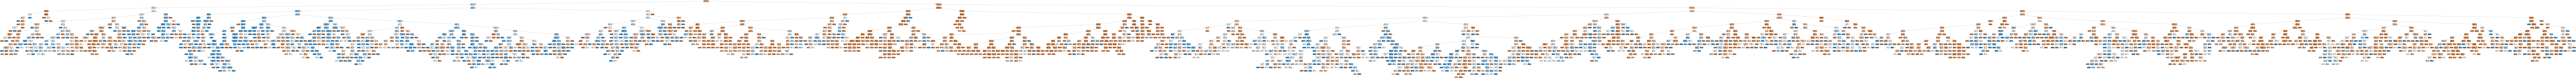

In [12]:
# A sample decision tree: There was a text box here and I was not sure what to enter so I build a default Decision Tree
model = DecisionTreeClassifier()
X = df[features]
Y = df["had_affair"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
dot_data = StringIO()  
tree.export_graphviz(model, out_file=dot_data, feature_names=features,filled=True, rounded=True, impurity=False)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<pre><b>
NOTE: As you can see, the default values for the parameters controlling the size of the trees
(e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially
be very large on some data sets. To reduce memory consumption, the complexity and size of the trees 
should be controlled by setting those parameter values. Let's try that in the next step!
</b></pre>

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

Type your code here

In [13]:
# Hints were good!
# Note - I had to place each graph print in its own cell to be able to display the three of them.

# Models
model1 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model1.fit(X_train, Y_train)
predictions1 = model1.predict(X_test)
model2 = DecisionTreeClassifier(max_depth=3, criterion= 'entropy')
model2.fit(X_train, Y_train)
predictions2 = model2.predict(X_test)
model3 = DecisionTreeClassifier(max_depth=4, criterion= 'entropy')
model3.fit(X_train, Y_train)
predictions3 = model3.predict(X_test)

# Send data to file
dot_data = StringIO()  
export_graphviz(model1, out_file=dot_data,feature_names=features,filled=True,rounded=True)
export_graphviz(model2, out_file=dot_data,feature_names=features,filled=True,rounded=True)
export_graphviz(model3, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  

# Please see graphs below

Confusion Matrix for Decision Tree:
 [[784  88]
 [276 126]]

Accuracy Score for Decision Tree:  0.7142857142857143

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       872
           1       0.59      0.31      0.41       402

    accuracy                           0.71      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.69      0.71      0.68      1274



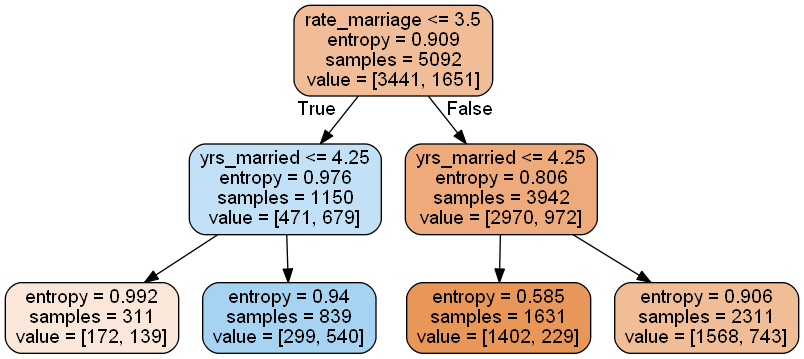

In [14]:
# Data for depth = 2
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(Y_test,predictions1))
print("\nAccuracy Score for Decision Tree: ", accuracy_score(Y_test, predictions1))
print("\nClassification Report for Decision Tree:\n", classification_report(Y_test,predictions1))
Image(graph[0].create_png())

Confusion Matrix for Decision Tree:
 [[784  88]
 [276 126]]

Accuracy Score for Decision Tree:  0.7142857142857143

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       872
           1       0.59      0.31      0.41       402

    accuracy                           0.71      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.69      0.71      0.68      1274



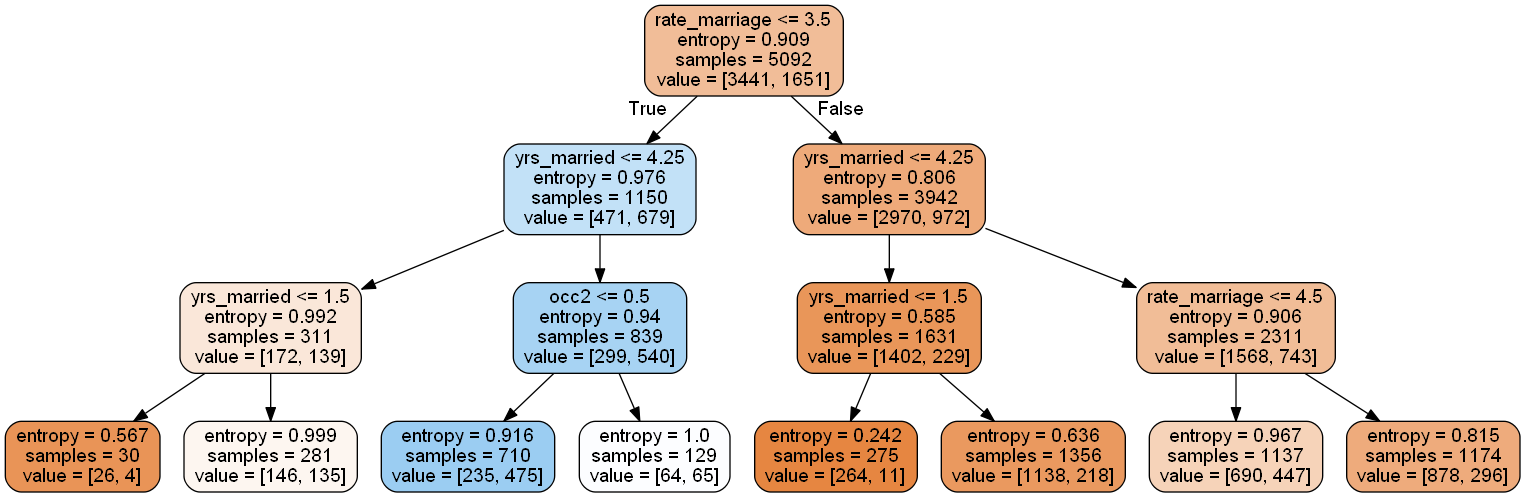

In [15]:
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(Y_test,predictions2))
print("\nAccuracy Score for Decision Tree: ", accuracy_score(Y_test, predictions2))
print("\nClassification Report for Decision Tree:\n", classification_report(Y_test,predictions2))
Image(graph[1].create_png())

Confusion Matrix for Decision Tree:
 [[779  93]
 [272 130]]

Accuracy Score for Decision Tree:  0.7135007849293563

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       872
           1       0.58      0.32      0.42       402

    accuracy                           0.71      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.69      0.71      0.69      1274



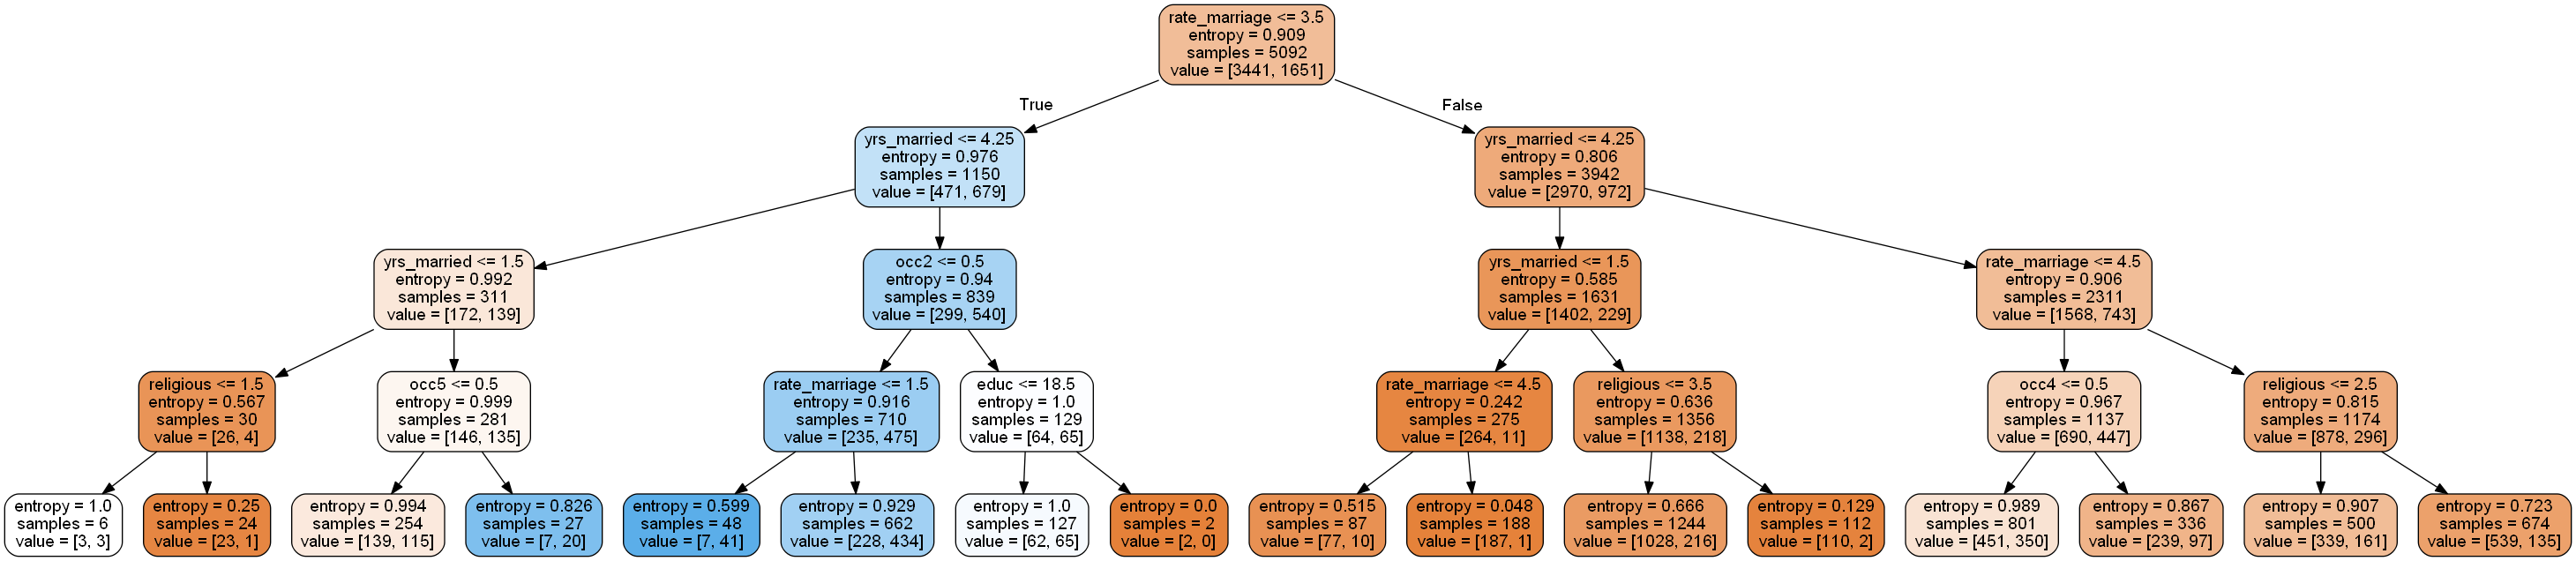

In [16]:
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(Y_test,predictions3))
print("\nAccuracy Score for Decision Tree: ", accuracy_score(Y_test, predictions3))
print("\nClassification Report for Decision Tree:\n", classification_report(Y_test,predictions3))
Image(graph[2].create_png())

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
rfc_result = rfc.predict(X_test)
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(Y_test, rfc_result ))
print("\nAccuracy Score for Decision Tree: ", accuracy_score(Y_test, rfc_result))
print("\nClassification Report for Decision Tree:\n", classification_report(Y_test, rfc_result))

Confusion Matrix for Decision Tree:
 [[708 164]
 [239 163]]

Accuracy Score for Decision Tree:  0.6836734693877551

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       872
           1       0.50      0.41      0.45       402

    accuracy                           0.68      1274
   macro avg       0.62      0.61      0.61      1274
weighted avg       0.67      0.68      0.67      1274



<pre><b>
In yet another result that went against my initial assumption, the random forest was not able to 
outperform the accuracy score from the decision trees of previous step. As stated previously, the 
decision trees with depths of 2 and 3 produced the best accuracy score of about 71%. The random 
forest, on the other hand, was not able to beat that value with its 68% accuracy. When talking 
about f1-score, from the three trees above, the best pair was returned by the tree with depth
4 at [0.81,0.42]. The random forest has returned a f1-score pair [0.78, 0.45]. That shows the 
preliminary that, case the target variable for study is 1, the random forest can be the best model
to analyze this data, however, cross validation is needed. 
If I can take a lesson from this howework is that:
    1. Maybe my code is not proper, reason why more advanced procedures did not yeild better results.
            a. Despite checking my code and flow multiple times, I was not able to find a logical
            errors. Ultimately, I hope item '1' is not the case.
    2. The initial human intuition is not the best tool to guess results from data analysis, making
       it clear that data must be carefully checked, cleaned, organized and properly analyzed 
       with the right tools prior to making any definite and actionalble conclusion.
       
-Vagner
</b><pre>